# Milestone 3 : Error estimation of numerical solutions

## 1. Write a function to evaluate errors of numerical integration by means of Richardson extrapolation. This function should be based on the Cauchy problem solution implemented in milestone 2.

In [1]:
import matplotlib.pyplot as plt
from numpy import  array, zeros, concatenate, linalg, any, linspace, shape, log
import import_ipynb
import Numerical_schemes
import Simple_Math
import Stability


def F1(U): 
    F = zeros(2)
    F[0] = U[1]
    F[1] = -U[0] 
    return F



def Cauchy_Error(F,U0,t,Temporal_scheme,q=1):  #F: Funcion Rn,  #U0: vector Rn, #t: Tiempo

    Nt = len(t) - 1
    Nv = len(U0)
            #Nt, Nv = shape(U1)
    E = zeros((Nt+1,Nv))

    t1 = t[:]
    
    t2 = linspace(t[0], t[Nt], 2*(Nt)+1 )
   

    U1 = Stability.Cauchy_Problem(F,U0,t1,Temporal_scheme)  #Solucion del problema de Cauchy en la malla 1
    U2 = Stability.Cauchy_Problem(F,U0,t2,Temporal_scheme)  #Solucion del problema de Cauchy en la malla 2

    


    for n in range(Nt):
        E[n,:] = (U2[2*n,:] - U1[n,:])/(1-1/2**q)

    return U1, E




## 2. Numerical error or different temporal schemes: Euler, Inverse Euler, Crank_Nicolson and fourth order Runge Kutta method.

### 2.1 EULER

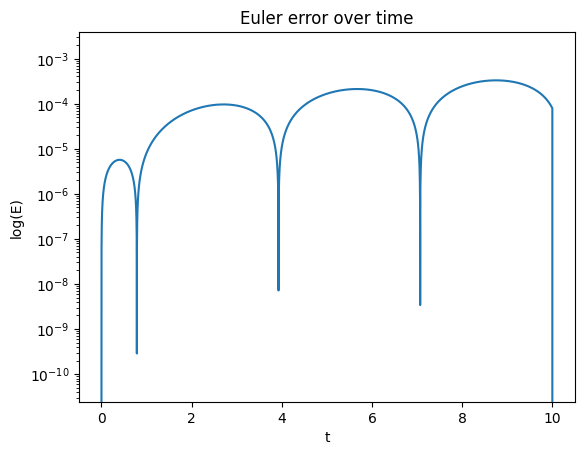

In [2]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

U1, E = Cauchy_Error(F1,U0,t,Numerical_schemes.Euler,4)


plt.axis("equal")
plt.plot(t,abs(E[:,1]))
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('log(E)')
plt.title('Euler error over time')

plt.show()

### 2.2 INVERSE EULER

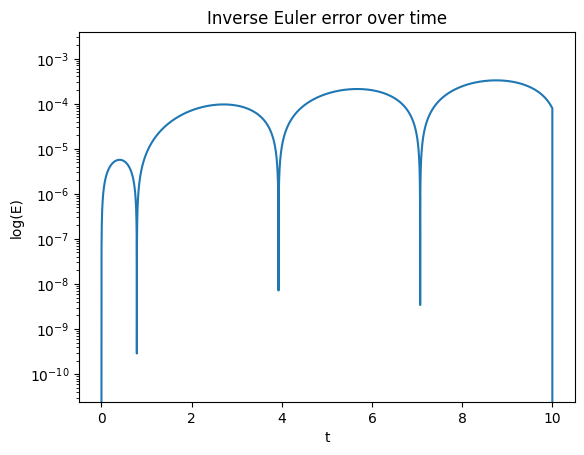

In [3]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

U1, E = Cauchy_Error(F1,U0,t,Numerical_schemes.Inverse_Euler,4)


plt.axis("equal")
plt.plot(t,abs(E[:,1]))
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('log(E)')
plt.title('Inverse Euler error over time')

plt.show()

### 2.3 CRANK NICOLSON

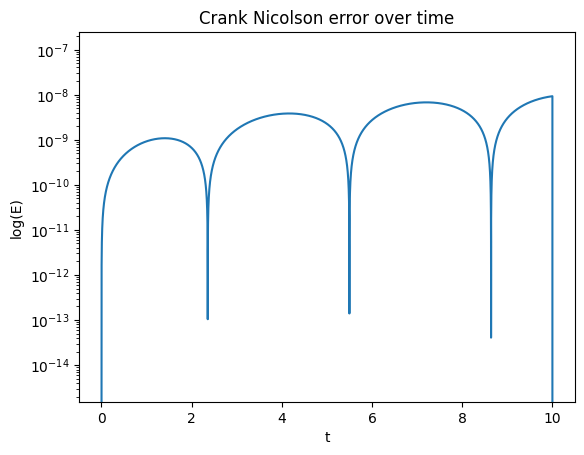

In [4]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

U1, E = Cauchy_Error(F1,U0,t,Numerical_schemes.Crank_Nicolson,4)


plt.axis("equal")
plt.plot(t,abs(E[:,1]))
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('log(E)')
plt.title('Crank Nicolson error over time')

plt.show()

### 2.4 RANGE KUTTA 4

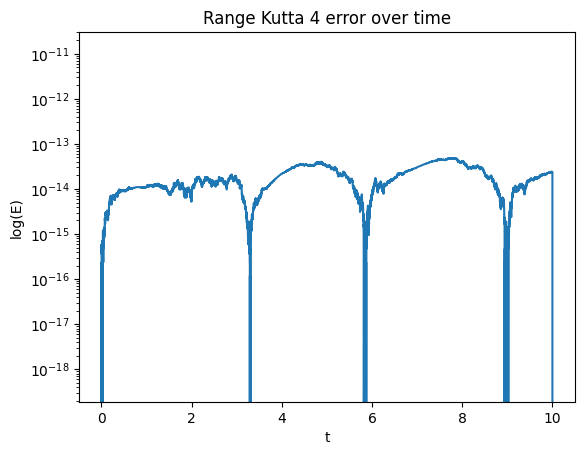

In [5]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

U1, E = Cauchy_Error(F1,U0,t,Numerical_schemes.RangeKutta4,4)


plt.axis("equal")
plt.plot(t,abs(E[:,1]))
plt.yscale('log')
plt.xlabel('t')
plt.ylabel('log(E)')
plt.title('Range Kutta 4 error over time')

plt.show()

## 3. Write a function to evaluate the convergence rate of different temporal schemes.

In [6]:
def Convergence_rate(Temporal_scheme, F, U0,t, Nm=10, q=1):


    N_mesh = zeros(Nm,dtype=int)
    E = zeros(Nm)
    logN = zeros(Nm)
    logE = zeros(Nm)
   
    for i in range(Nm):
        N_mesh[i] = (20 + 20*i)
    # N_mesh = array([100, 300, 500, 700, 900])

    
    N = len(t) - 1
    for n in range(Nm):
        t_n = linspace(t[0], t[N], N_mesh[n])
        U1, E = Cauchy_Error(F,U0,t_n,Temporal_scheme, q)
        logN[n] = log(len(t_n))
        logE[n] = log(abs(E).max())

    deltay = logE[int(Nm/2) + 1] - logE[int(Nm/2)]
    deltax = logN[int(Nm/2) + 1] - logN[int(Nm/2)]

    m = deltay/deltax

    return logN, logE, m
    




## 4. Convergence rate of the different methods with the time step.

### 4.1 EULER

-1.0317384092500792


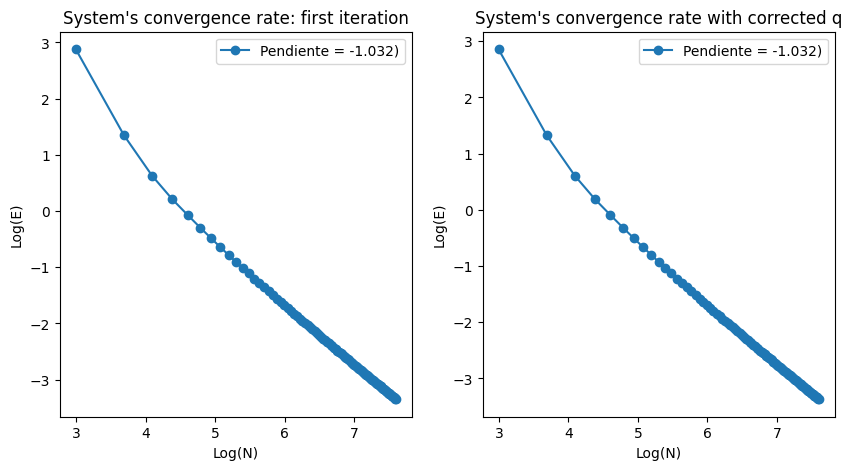

In [7]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

logN, logE, pendiente = Convergence_rate(Numerical_schemes.Euler, F1, U0,t, 100)
print(pendiente)

logN2, logE2, m = Convergence_rate(Numerical_schemes.Euler, F1, U0,t, 100, abs(pendiente))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(logN,logE,'-o',label=f"Pendiente = {pendiente:.4g})")
plt.legend()
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.title("System's convergence rate: first iteration")


plt.subplot(1,2,2)
plt.plot(logN2,logE2,'-o',label=f"Pendiente = {pendiente:.4g})")
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.legend()
plt.title("System's convergence rate with corrected q")
plt.show()

### 4.2 INVERSE EULER

-0.9634863881255168


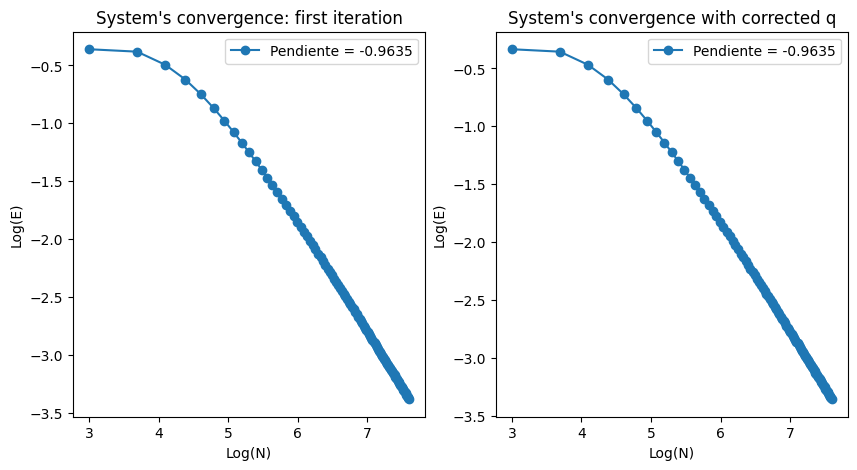

In [8]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

logN, logE, pendiente = Convergence_rate(Numerical_schemes.Inverse_Euler, F1, U0,t, 100)
print(pendiente)

logN2, logE2, m = Convergence_rate(Numerical_schemes.Inverse_Euler, F1, U0,t, 100, abs(pendiente))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(logN,logE,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.legend()
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.title("System's convergence: first iteration")


plt.subplot(1,2,2)
plt.plot(logN2,logE2,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.legend()
plt.title("System's convergence with corrected q")
plt.show()

### 4.3 CRANK NICOLSON

In [ ]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

logN, logE, pendiente = Convergence_rate(Numerical_schemes.Crank_Nicolson, F1, U0,t, 100)
print(pendiente)

logN2, logE2, m = Convergence_rate(Numerical_schemes.Crank_Nicolson, F1, U0,t, 100, abs(pendiente))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(logN,logE,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.legend()
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.title("System's convergence: first iteration")


plt.subplot(1,2,2)
plt.plot(logN2,logE2,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.legend()
plt.title("System's convergence with corrected q")
plt.show()

-1.998737693761234


### 4.4 RANGE KUTTA 4

-3.998606045371741


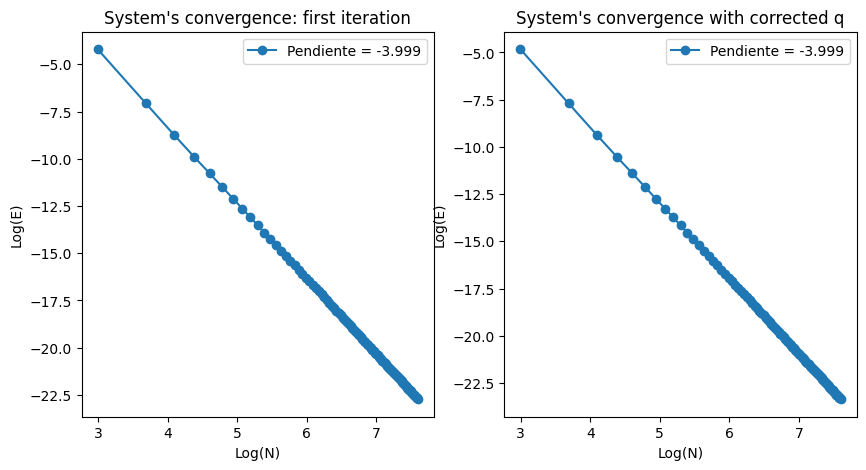

In [ ]:
U0 = array([1,1])   #Initial conditions

t0 = 0
tf = 10
np = 100000


t = linspace(t0, tf, np)

logN, logE, pendiente = Convergence_rate(Numerical_schemes.RangeKutta4, F1, U0,t, 100)
print(pendiente)

logN2, logE2, m = Convergence_rate(Numerical_schemes.RangeKutta4, F1, U0,t, 100, abs(pendiente))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(logN,logE,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.legend()
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.title("System's convergence: first iteration")


plt.subplot(1,2,2)
plt.plot(logN2,logE2,'-o',label=f"Pendiente = {pendiente:.4g}")
plt.xlabel('Log(N)')
plt.ylabel('Log(E)')
plt.legend()
plt.title("System's convergence with corrected q")
plt.show()




2